In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os

Using TensorFlow backend.


In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_trained_model = InceptionV3(input_shape = (150,150,3),
                               include_top = False,
                               weights = "imagenet")
for layer in pre_trained_model.layers:
    layer.trainable = False

In [6]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [4]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('acc')>0.95):
                print("Reached 95% accuracy,so cancelling training!\n")
                self.model.stop_training = True
callbacks = myCallback()

In [7]:
from tensorflow.keras.optimizers import RMSprop
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024,activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)                  
x = tf.keras.layers.Dense(10,activation = 'softmax')(x)           

model = tf.keras.Model(pre_trained_model.input,x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])


In [8]:
path_train = os.path.join(os.getcwd(),"training")
path_test = os.path.join(os.getcwd(),"testing")

train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(path_train,
                                                   batch_size = 128,
                                                   target_size = (150,150),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(rescale = 1.0/255)

valid_generator = valid_datagen.flow_from_directory(path_test,
                                                   batch_size = 32,
                                                   target_size = (150,150),
                                                   class_mode = 'categorical')

Found 2145 images belonging to 10 classes.
Found 379 images belonging to 10 classes.


In [10]:
history = model.fit(train_generator,
                             steps_per_epoch = 17,
                             epochs = 20,
                             verbose = 1,
                             validation_data = valid_generator,
                             validation_steps = 12,
                             callbacks = [callbacks])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 17 steps, validate for 12 steps
Epoch 1/20
17/17 [==============================] - 11s 628ms/step - loss: 0.7101 - acc: 0.7734 - val_loss: 0.9573 - val_acc: 0.7098
Epoch 2/20
17/17 [==============================] - 11s 658ms/step - loss: 0.6209 - acc: 0.7907 - val_loss: 0.9961 - val_acc: 0.6939
Epoch 3/20
17/17 [==============================] - 11s 653ms/step - loss: 0.5415 - acc: 0.8247 - val_loss: 1.0740 - val_acc: 0.6834
Epoch 4/20
17/17 [==============================] - 11s 646ms/step - loss: 0.5265 - acc: 0.8214 - val_loss: 0.9050 - val_acc: 0.7256
Epoch 5/20
17/17 [==============================] - 11s 658ms/step - loss: 0.4623 - acc: 0.8536 - val_loss: 0.8039 - val_acc: 0.7414
Epoch 6/20
17/17 [==============================] - 11s 648ms/step - loss: 0.4923 - acc: 0.8387 - val_loss: 1.0432 - val_acc: 0.6939
Epoch 7/20
17/17 [==============================] - 11s 650ms/step - loss: 0.4251 - acc: 0.8545 - val_loss: 1.

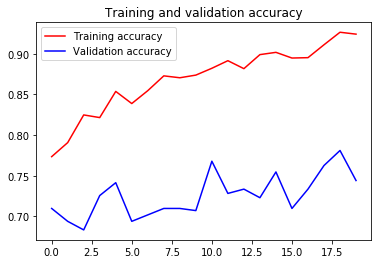

<Figure size 432x288 with 0 Axes>

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

(1, 150, 150, 3)

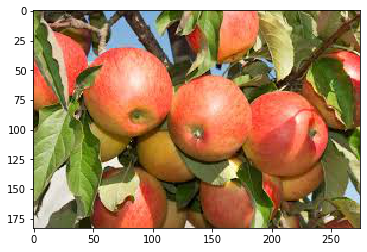

In [13]:
filename = "apple.jpg" #CHANGE THIS TO YOUR NAME OF YOUR IMAGE
from matplotlib import image
img = image.imread(os.path.join(os.getcwd(),filename))
plt.imshow(img)
from PIL import Image
img = np.array(Image.open(os.path.join(os.getcwd(),filename)).resize((150,150)))
img = img/255.0
img = np.expand_dims(img,axis=0)
img.shape

In [14]:
#Show the probabilities predicted for each class
predictions = model.predict(img)
predictions

array([[1.0634976e-03, 2.3679910e-08, 4.2044437e-07, 1.6655633e-05,
        9.8988422e-12, 1.1464691e-06, 1.9037648e-01, 8.8755758e-10,
        8.0854118e-01, 6.6037967e-07]], dtype=float32)

In [15]:
np.argmax(predictions)

8